<a href="https://colab.research.google.com/github/jpineda714/CIENCIA_DATOS_2025/blob/main/Tarea_dataset_Variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy import trim_mean
import matplotlib.pyplot as plt
from statsmodels import robust
import wquantiles

In [4]:
data = pd.read_csv("/content/drive/MyDrive/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
Mayor_poblacion = data.groupby(["bmi"])["age"].max()
Mayor_poblacion

,age
bmi,
15.960,18
16.815,38
17.195,26
17.290,37
17.385,23
...,...
48.070,46
49.060,58
50.380,23


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Calculando la desviacion estandar y los cuartiles
data["bmi"].std()

6.098186911679017

In [12]:
#Calcular el IQR
data.bmi.quantile(0.75) - data.bmi.quantile(0.25)

np.float64(8.3975)

In [13]:
robust.scale.mad(data["bmi"])

np.float64(6.197277273353416)

In [14]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["bmi"])

np.float64(6.197277273353416)

In [15]:
#Reemplazar headers de ingles a español
data_español = data.rename(columns={"age": "Edad", "sex":"Sexo","children":"niño","smoker":"fumador", "charges":"costos"})
data_español

,Edad,Sexo,bmi,niño,fumador,region,costos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
###4.1 Diagrama de caja
data["bmi"].quantile([0.05,0.25,0.5,0.75,0.95])

,bmi
0.05,21.25600
0.25,26.29625
0.50,30.40000
0.75,34.69375
0.95,41.10600


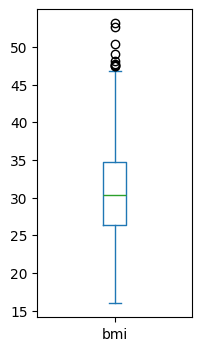

In [19]:
#Grafica de diagrama de caja
ax = (data.bmi).plot.box(figsize = (2,4))


In [20]:
#Calculo de la tabla de frecuencia e histograma
binnedPopulation = pd.cut(data["bmi"],10)
binnedPopulation.value_counts()

,count
bmi,
"(27.111, 30.828]",319
"(30.828, 34.545]",288
"(23.394, 27.111]",234
"(34.545, 38.262]",195
"(19.677, 23.394]",127
"(38.262, 41.979]",96
"(41.979, 45.696]",32
"(15.923, 19.677]",30
"(45.696, 49.413]",14


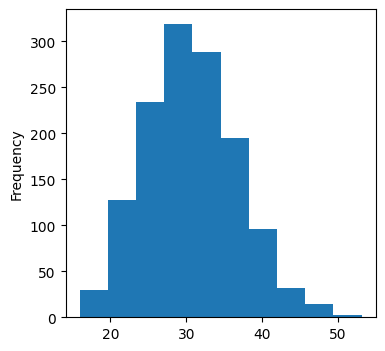

In [22]:
ax = (data["bmi"]).plot.hist(figsize = (4,4))

<Axes: ylabel='Density'>

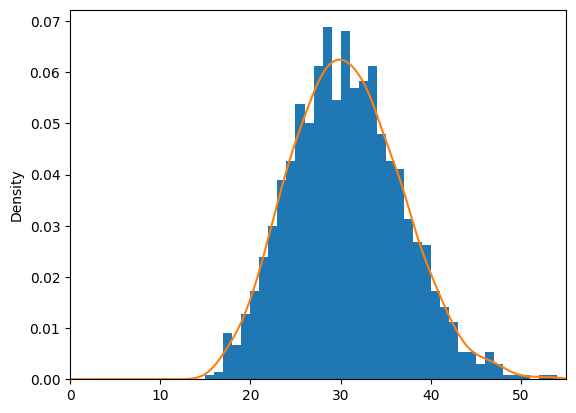

In [25]:
#diagrama de dispersion y curva de densidad
ax = data["bmi"].plot.hist(density = True, xlim = [0,55], bins = range (1,55))
data["bmi"].plot.density(ax = ax)